<h1>Individual Planning Report</h1> <h3>- Group19_ds_project </p>
    Hiu Lam LIN</h3>

**<h4>(1) Data Description**</h4>

1. </p>
players: 196 observations</p>
sessions: 1535 observations

2. 
**players**:
|   |  Mean |   Max  |   Min  |
| :---------------- | ----: | -----: | -----: |
| played_hours      | 5.846 | 223.100  | 0  |
| Age               | 21.14 | 58.00  | 9.00  |

Counts for variables: “experience”, “hashedEmail”, “name”, “gender” are the same, 196 each

Counts in experience:
|  |  |
| :---------------- | ----: |
| Amateur      | 63 |
| Beginner      | 35 |
| Pro      | 14 |
| Regular      | 36 |
| Veteran      | 48 | 

Counts in subscribe:
|  FALSE | TRUE |
| ----: | -----: | 
| 52 | 144  | 

**sessions**:
| Variables\Item      |  Mean     |   Max      |   Min      |
| :------------------ | --------: | ---------: | ---------: |
| original_start_time | 1.719e+12 | 1.727e+12  | 1.712e+12  |
| original_end_time   | 1.719e+12 | 1.727e+12  | 1.712e+12  |

Counts for variables: “hashedEmail”, “start_time”, “end_time” are the same, 1535 each

3. </p>
players: 7 variables</p>
sessions: 5 variables</p>
4. 
players:
 | Names of variables    | Types of variables |
| :-------- | :------- |
| experience  | character    |
| subscribe |  logical     |
| hashedEmail    | character    |
| played_hours      | double |
| name              | character  |
| gender            | character  |
| Age               | double |

sessions:
 | Names of variables    | Types of variables |
| :-------- | :------- |
| hashedEmail      | character |
| started_time      | character |
| end_time      | character |
| original_start_time       | double  |
| original_end_time      | double ||

5. 
</p>players: variables in character type and logical type are qualitative information, and the variables in double type are quantitative.

- experience: experience levels of players classified into levels: “Amateur”, “Beginner”, “Pro”, “Regular”, “Veteran”.
- subscribe: whether players subscribe to a game-related newsletter, indicated with TRUE and FALSE
- hashedEmail: players’ email address
- played_hours: players’ total playing durations in the server in hours
- name: name of players
- gender: gender of players
- Age: age of players

sessions:
- hashedEmail: players’ email address
- start_time: start time of each play session in **date format** (dd/mm/yyyy & time)
- end_time: end time of each play session in **date format** 
- original_start_time: start time of each play session in **seconds**
- original_end_time: end time of each play session in **seconds**

6. 
- The start time and end time in sessions.csv are in date format (chr), and there is no column about the total spending time of each session.
- Some variables are not useful for investigating the questions, and data should be wrangled.
- “Age” in players.csv includes “N/A”
- Experience (players.csv) for “Pro” & “Amateur” differences are large (14 & 63), which may make “Pro” underrepresent.

7.
- The information provided by players could be inaccurate, such as experience; there could be bias across players in determining their experience level, which makes the information not very accurate for comparison. 

8. 
- The research group records players' gameplay, speech, and key presses in the PLAICraft Minecraft browser window to collect the data.


In [7]:
library(tidyverse)
library(tidymodels)
library(repr)
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
head(players)
head(sessions)
nrow(players)
nrow(sessions)
summary(players)
summary(sessions)
players |> count(experience)
players |> count(Age)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 196

[1] 1535

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


Age,n
<dbl>,<int>
9,1
10,1
11,1
12,1
14,2
15,2
16,3
17,73
18,7


**<h4>(2) Questions**</h4>

Board Question Q(2)
- Specific: Does the amount of time a player spends in the game [played_hours] predict whether they subscribe to a game-related newsletter [subscribe] in [players.csv] dataset?

- The variables [subscribe] and [played_hours] in [players.csv] can be used to find the relationship between players' playing duration and outcome of subscribing game-related newsletter, which allows me to use a model to check whether [subscribe] is predictable with [played_hours].

- I need to convert [subscribe] into factor type with as.factor() and mutate() functions, rename "TRUE" and "FALSE" into "Y" and "N" respectively, select [subscribe] and [played_hours] as they are the only variables required in the model to address the question. 

- KNN-Classification method


**<h4>(3) Exploratory Data Analysis and Visualization**</h4>

•	Make a few exploratory visualizations of the data to help you understand it.
o	Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
o	Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. 
We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.


In [28]:
library(tidyverse)
library(tidymodels)
library(tibble)
library(repr)
# dataset loaded into R
players <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


No wrangling is required for players.csv as it satisfies the criteria of having a single observation in each row, a single variable in each column, and each value is a single cell. There are no "NA" values in both columns.

In [29]:
# mean of played_hours
mean_played_hours <- players |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))

# mean of Age
mean_age <- players |>
  summarise(mean_age = mean(Age, na.rm = TRUE))

# mean values in a table format
summary_table <- tibble(mean_played_hours, mean_age)
summary_table

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


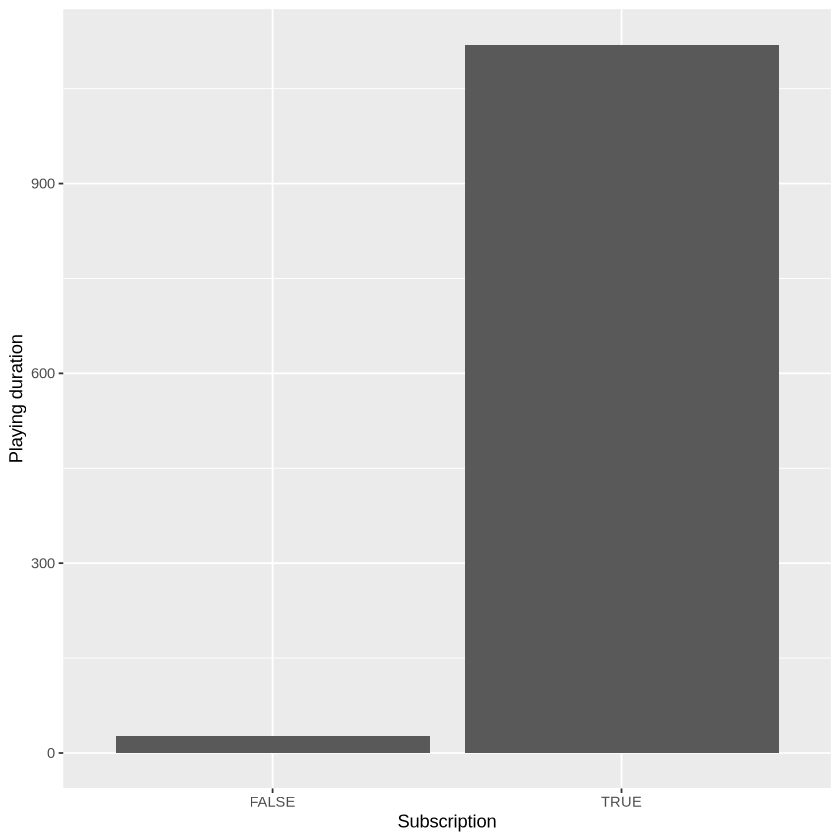

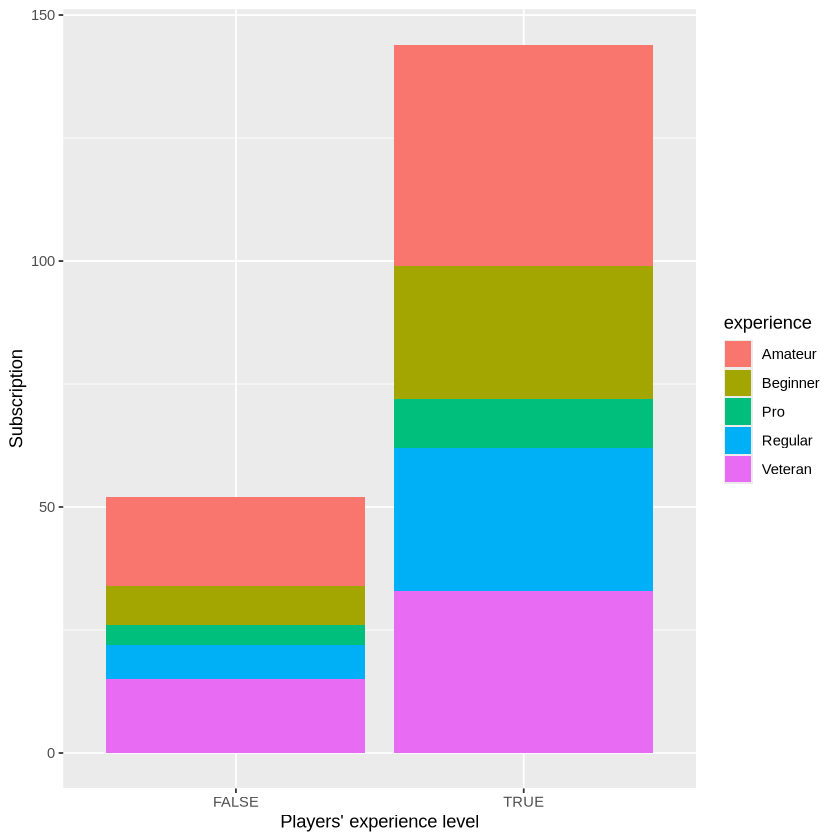

In [59]:
# create the visualization
plt_1 <- ggplot(players, aes(x = as_factor(subscribe), y = played_hours)) +
  geom_bar(stat = "identity") +
  xlab("Subscription") +
  ylab("Playing duration")
plt_1

plt_2 <- ggplot(players, aes(x = subscribe, fill = experience)) +
  geom_histogram(stat = "count") +
  xlab("Players' experience level") +
  ylab("Subscription")
plt_2